<a href="https://colab.research.google.com/github/AbyssWatcher07/DIFGRI30_A_25_2311532021_Stanley-Leonard-Darmali-/blob/main/Praktikum1/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing


In [ ]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseValue'] = pd.Series(housing.target)

targets = df['MedHouseValue']                 #Dependent
inputs = df.drop('MedHouseValue', axis=1)     #Independent
df.head(3)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [ ]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Data Preprocessing
Data train(70%), Data test(30%)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(14448, 8) (6192, 8)
(14448,) (6192,)


In [ ]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
print(x_test)


[[8.14678418e-02 4.70588235e-01 2.34243862e-02 ... 2.56319369e-03
  3.73404255e-01 5.31872510e-01]
 [1.40094619e-01 5.68627451e-01 2.94319155e-02 ... 1.59940545e-03
  2.75531915e-01 4.87051793e-01]
 [2.05528200e-01 1.00000000e+00 2.18994569e-02 ... 5.37584539e-04
  5.58510638e-01 1.90239044e-01]
 ...
 [2.07728169e-01 2.94117647e-01 2.03757930e-02 ... 1.34975225e-03
  1.19148936e-01 6.41434263e-01]
 [2.17245279e-01 1.76470588e-01 3.27130659e-02 ... 2.29769634e-03
  5.60638298e-01 3.05776892e-01]
 [1.76004469e-01 3.13725490e-01 1.74931855e-02 ... 1.54725775e-03
  1.70212766e-01 6.08565737e-01]]


In [19]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [20]:
print(f'intercept: {lr_model.intercept_}')
print(f'slope: {lr_model.coef_}')

intercept: 3.6307047193242292
slope: [  6.46451636   0.49377527 -17.21787732  19.70092818  -0.02767764
  -4.1877334   -3.93424542  -4.35422728]


In [23]:
y_pred =lr_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2=lr_model.score(x_test, y_test)
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 0.530567782476675
R2: 0.5957702326061665


In [29]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))

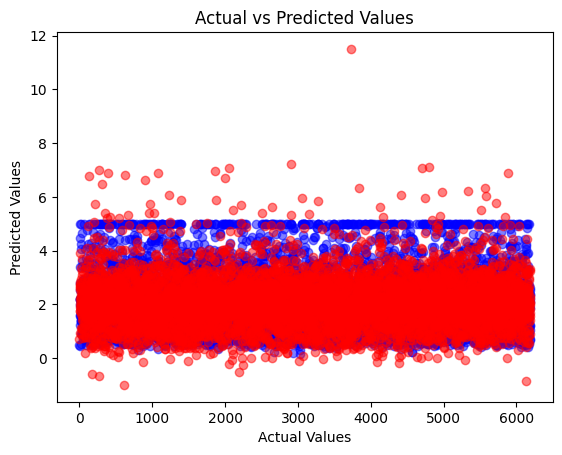

In [33]:
index = np.arange(len(y_test))

plt.scatter(index, y_test, color='blue', label='Actual Values', alpha=0.5)

plt.scatter(index, y_pred, color='red', label='Predicted Values', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()